# Configuration

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import time

In [2]:
SAVED_FILE = 'faces'
FF = cv2.FONT_HERSHEY_SIMPLEX
FZ = 0.5
FT = 1
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
fps = 0
prev_time = time.time()
current_image = None

In [3]:
def get_fps():
    global prev_time
    # Calculate and display FPS
    curr_time = time.time()
    fps = 1 / (curr_time - prev_time)
    prev_time = curr_time
    return f"FPS: {fps:.2f}"

# Load pre-trained faces

In [4]:
class_id = 0
face_data = []
lables = []
names = {}
print('==> Loading data...\n')
for fx in os.listdir(SAVED_FILE):
    if fx.endswith('.npy'):
        names[class_id] = fx[:-4]
        data_item = np.load(f'{SAVED_FILE}/{fx}')
        face_data.append(data_item)
        
        print('Label: {}\nName: {}\nFaces: {}\n'.format(class_id, names[class_id], data_item.shape[0]))

        target = class_id * np.ones((data_item.shape[0],))
        
        class_id += 1
        lables.append(target)
        
print('==> Loading Successfully...')

==> Loading data...

Label: 0
Name: Pong
Faces: 125

Label: 1
Name: Senghout
Faces: 99

Label: 2
Name: Nita
Faces: 130

Label: 3
Name: Mongkol
Faces: 131

==> Loading Successfully...


In [5]:
print('==> Loading data...\n')

face_dataset = np.concatenate(face_data, axis=0)
face_lables = np.concatenate(lables, axis=0).reshape(-1, 1)
print('Total Faces: {}\nTotal Label: {}\n'.format(face_dataset.shape, face_lables.shape))

print('==> Loading Successfully...')

==> Loading data...

Total Faces: (485, 10000)
Total Label: (485, 1)

==> Loading Successfully...


In [6]:
face_dataset

array([[236, 236, 236, ..., 236, 236, 236],
       [224, 236, 236, ..., 236, 236, 236],
       [226, 225, 227, ..., 236, 236, 236],
       ...,
       [226, 224, 236, ..., 236, 236, 236],
       [223, 227, 236, ..., 236, 236,  20],
       [226, 224, 226, ..., 236, 236, 236]], dtype=uint8)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
face_data_scaled = scaler.fit_transform(face_dataset)

print('==> Loading data...\n')

train_set = np.concatenate((face_data_scaled, face_lables), axis=1)
print('Training Set: {}\n'.format(train_set.shape))

print('==> Loading Successfully...')

==> Loading data...

Training Set: (485, 10001)

==> Loading Successfully...


In [8]:
face_data_scaled

array([[1.        , 0.97156398, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.94202899, 0.97156398, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.95169082, 0.91943128, 0.95588235, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.95169082, 0.91469194, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.93719807, 0.92890995, 1.        , ..., 1.        , 1.        ,
        0.06086957],
       [0.95169082, 0.91469194, 0.95098039, ..., 1.        , 1.        ,
        1.        ]])

In [9]:
face_data_scaled

array([[1.        , 0.97156398, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.94202899, 0.97156398, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.95169082, 0.91943128, 0.95588235, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.95169082, 0.91469194, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.93719807, 0.92890995, 1.        , ..., 1.        , 1.        ,
        0.06086957],
       [0.95169082, 0.91469194, 0.95098039, ..., 1.        , 1.        ,
        1.        ]])

# Define pre-trained faces in Data Frame

In [10]:
# show train_set as pandas to see the data frame
import pandas as pd

# Generate column names based on the number of features in train_set
num_features = train_set.shape[1]
columns = [f'Feature_{i}' for i in range(num_features)]

df = pd.DataFrame(train_set, columns=columns)

df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_9991,Feature_9992,Feature_9993,Feature_9994,Feature_9995,Feature_9996,Feature_9997,Feature_9998,Feature_9999,Feature_10000
0,1.000000,0.971564,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,1.000000,1.000000,0.0
1,0.942029,0.971564,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,1.000000,1.000000,0.0
2,0.951691,0.919431,0.955882,0.941176,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,1.000000,1.000000,0.0
3,0.937198,0.729858,0.740196,0.735294,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,1.000000,1.000000,0.0
4,1.000000,0.971564,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.946860,0.919431,0.965686,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,0.077922,0.069565,3.0
481,0.951691,0.914692,0.950980,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,0.125541,0.082609,3.0
482,0.951691,0.914692,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,1.000000,1.000000,3.0
483,0.937198,0.928910,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,...,1.0,1.0,0.95,0.970833,0.931174,0.970213,1.0,1.000000,0.060870,3.0


In [11]:
print('The "Feature_10000" is the target label for the corresponding faces')

The "Feature_10000" is the target label for the corresponding faces


# Define Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

split_size = 0.3

print('==> Splitting the data by {}%\n'.format(split_size * 100))

X_train, X_test, y_train, y_test = train_test_split(face_data_scaled, face_lables, test_size=split_size, random_state=42)

print("Train Data (X Train):\n{}\n\nTest Data (X Test):\n{}\n".format(X_train.shape, X_test.shape))

print('==> Splitting Successfully...')

==> Splitting the data by 30.0%

Train Data (X Train):
(339, 10000)

Test Data (X Test):
(146, 10000)

==> Splitting Successfully...


# Defind KNN Model

In [13]:
# def knn_train(train, test, k=5, distance_threshold=20):
#     distances = []
#     X_train, y_train = train[:, :-1], train[:, -1]

#     # Calculate Euclidean distances between the test face and each training face
#     for i in range(X_train.shape[0]):
#         d = np.sqrt(((X_train[i] - test) ** 2).sum())  # Compute the distance manually
#         distances.append([d, y_train[i]])

#     # Sort distances and select top-k neighbors
#     distances = sorted(distances, key=lambda x: x[0])[:k]
#     labels = np.array([d[1] for d in distances])

#     # Find the most frequent label (the predicted class)
#     unique_labels, counts = np.unique(labels, return_counts=True)
#     predicted_label = unique_labels[np.argmax(counts)]

#     # Check if the distance to the nearest neighbor is above the threshold
#     min_distance = round(distances[0][0], 2)  # Minimum distance to nearest neighbor
    
#     print(min_distance)
    
#     if min_distance > distance_threshold:
#         return 'unknown', min_distance  # Classify as "unknown" if the distance is too large

#     return predicted_label, min_distance

import heapq  # To find top-k efficiently

K = 5

# best threshold = 21

def knn_train(train, test, k=K, distance_threshold=35):
    # Extract features and labels
    X_train, y_train = train[:, :-1], train[:, -1]
    
    # Calculate Euclidean distances using np.linalg.norm for efficiency
    distances = np.linalg.norm(X_train - test, axis=1)
    
    # print('d', distances)
    
    # Find top-k nearest neighbors using heapq for efficiency
    k_indices = heapq.nsmallest(k, range(len(distances)), key=lambda i: distances[i]) #heapq.nsmallest(k, iterable, key=None)
    # k: Number of smallest elements to retrieve.
    # iterable: The input collection (e.g., list, range).
    # key: (Optional) A function that computes a value for comparison.
    
    smallest_distances = [distances[i] for i in k_indices]
    
    # Get the labels of the k nearest neighbors
    nearest_labels = y_train[k_indices]
    
    # Ensure the labels are integers (if they are floats)
    nearest_labels = nearest_labels.astype(int)
    
    # Find the most frequent label (predicted class)
    predicted_label = np.bincount(nearest_labels).argmax()
    
    # print('kkk', k_indices, smallest_distances)
    # print('{} {}\n'.format(nearest_labels, np.bincount(nearest_labels).argmax()))
    
    # Get the minimum distance of the nearest neighbor
    min_distance = distances[k_indices[0]]

    # If the minimum distance is above the threshold, return 'unknown'
    if min_distance > distance_threshold:
        return 'unknown', round(min_distance, 2)

    return predicted_label, round(min_distance, 2)

# Define Accuracy

In [14]:
# Combine training data and labels for knn input
knn_train_set = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)

In [15]:
knn_train_set.shape

(339, 10001)

In [16]:
X_test.shape

(146, 10000)

In [17]:
# Predict and evaluate accuracy
y_pred = []
for test_sample in X_test:
    
    # with standard scaler [5, 7, 9, 3]
    results = knn_train(train_set, test_sample) #98.85057471264368 % #98.07692307692307 % #97.43589743589743 % #97.43589743589743 % #99.35897435897436 %
    # results = knn_train(knn_train_set, test_sample) #96.55172413793103 % #96.15384615384616 % #94.87179487179486 % #94.23076923076923 %
    
    prediction = results[0]
    y_pred.append(prediction)

y_pred = np.array(y_pred)

# Convert y_pred to float to match y_test
# Map 'unknown' to -1 and convert the rest to floats
y_pred = np.where(y_pred == 'unknown', -1, y_pred).astype(float)

accuracy = accuracy_score(y_test.flatten(), y_pred)

print("Accuracy:", accuracy * 100, "%")

# prediction, min_distance = knn_train(train_set, test_sample) #Accuracy: 95.83333333333334 %
# # prediction = knn(train_set, test_sample) #Accuracy: 90.27777777777779 %

Accuracy: 97.94520547945206 %


In [18]:
y_pred

array([3., 3., 1., 3., 3., 1., 3., 2., 3., 2., 0., 1., 3., 2., 1., 3., 0.,
       0., 3., 0., 2., 3., 2., 3., 0., 1., 3., 3., 0., 0., 0., 2., 3., 0.,
       0., 0., 0., 0., 3., 2., 1., 3., 0., 3., 0., 0., 0., 0., 3., 0., 3.,
       3., 1., 3., 2., 1., 1., 2., 0., 2., 1., 3., 1., 3., 0., 0., 1., 0.,
       3., 2., 2., 0., 0., 3., 2., 0., 2., 1., 1., 2., 2., 1., 3., 0., 3.,
       0., 3., 3., 0., 2., 2., 0., 1., 3., 2., 2., 1., 3., 0., 1., 2., 3.,
       2., 0., 3., 3., 2., 3., 2., 3., 2., 1., 2., 0., 2., 0., 0., 0., 2.,
       2., 2., 3., 0., 2., 1., 3., 0., 0., 3., 0., 3., 3., 0., 1., 2., 0.,
       2., 3., 3., 0., 0., 0., 0., 3., 2., 0.])

In [19]:
label_map = {i: name for i, name in enumerate(names.values())}
label_map

{0: 'Pong', 1: 'Senghout', 2: 'Nita', 3: 'Mongkol'}

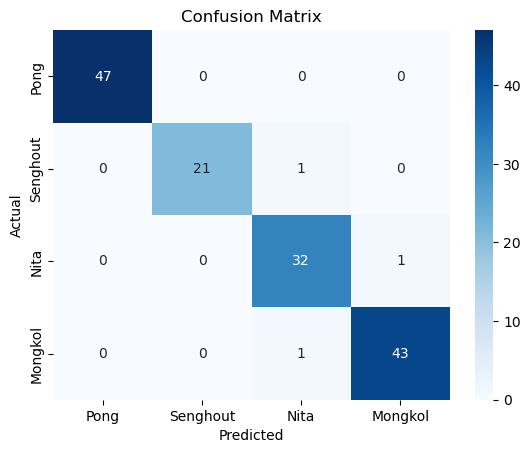

              precision    recall  f1-score   support

        Pong       1.00      1.00      1.00        47
    Senghout       1.00      0.95      0.98        22
        Nita       0.94      0.97      0.96        33
     Mongkol       0.98      0.98      0.98        44

    accuracy                           0.98       146
   macro avg       0.98      0.98      0.98       146
weighted avg       0.98      0.98      0.98       146



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Filter out unknown predictions
valid_indices = y_pred != -1
y_pred_valid = y_pred[valid_indices]
y_test_valid = y_test[valid_indices]

cm = confusion_matrix(y_test_valid, y_pred_valid)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(label_map.values()), yticklabels=list(label_map.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test_valid, y_pred_valid, target_names=list(label_map.values())))

(485, 10000) (485,)
{0: 'Pong', 1: 'Senghout', 2: 'Nita', 3: 'Mongkol'}


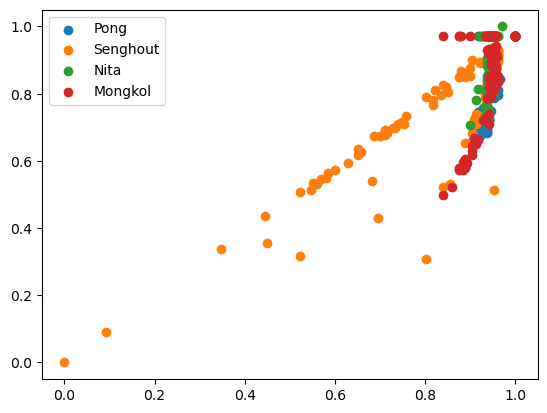

In [21]:
X_train = train_set[:, :-1]
Y_train = train_set[:, -1]
print(X_train.shape, Y_train.shape)
print(names)

for i in range(len(names)):
    plt.scatter(X_train[Y_train.flatten() == i, 0], X_train[Y_train.flatten() == i, 1], label=names[i])

plt.legend()
plt.show()

# Test Model

In [23]:
cap = cv2.VideoCapture(0)

detector = MTCNN()

while True:
    ret, frame = cap.read()

    if ret == False:
        continue
    
    small_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    rgb = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)
    
    results = detector.detect_faces(rgb)
    
    if results:
        
        for res in results:
            
            confidence = res['confidence']
            
            if (confidence < 0.95):
                continue

            # Scale confidence to two decimal places
            confidence = int(confidence * 100) / 100
            
            x,y,w,h = res['box'] #if not resize
            
            face = small_frame[y:y+h, x:x+w]
            
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            
            face = cv2.resize(face, (100, 100))
            
            current_image = face
            
            # standard scaler
            face = face.reshape(1, -1)
            face = scaler.transform(face)
            
            # without standard scaler
            # face = face.flatten()            
            
            # out = knn(train_set, face.flatten())
            
            # Predict the label and get the distance
            predicted_label, min_distance = knn_train(train_set, face)
            
             # Map the prediction to the name (if not 'unknown')
            pred_name = predicted_label if predicted_label == 'unknown' else names[int(predicted_label)]
            
            print(pred_name, min_distance)
            
            cv2.putText(small_frame, pred_name, (x, y-20), FF, FZ, (42, 219, 95), FT)
            cv2.putText(small_frame, str(confidence), (x, y-5), FF, FZ, (42, 219, 95), FT)
            cv2.rectangle(small_frame, (x, y), (x+w, y+h), (0, 255, 255), FT)

    cv2.putText(small_frame, get_fps(), (10, 20), FF, FZ, (0, 255, 255), FT)
    
    cv2.imshow('Faces Recognition, Smile ;)', small_frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

Senghout 15.93
Senghout 17.32
Senghout 17.37
Senghout 17.8
Senghout 17.36
Senghout 17.51
Senghout 16.68
Senghout 16.16
Senghout 15.51
Senghout 15.23
Senghout 14.44
Senghout 14.79
Senghout 13.9
Senghout 15.08
Senghout 16.12
Senghout 16.3
Senghout 15.62
Senghout 15.87
Senghout 14.32
Senghout 14.75
Senghout 13.53
Senghout 12.59
Senghout 12.82
Senghout 12.35
Senghout 15.43
Senghout 16.63
Senghout 17.47
Senghout 17.34
Senghout 20.79
Senghout 23.13
Senghout 23.14
Senghout 21.23
Senghout 20.05
Senghout 19.45
Senghout 19.35
Senghout 18.15
Senghout 17.09
Senghout 16.33
Senghout 15.8
Senghout 15.5
Senghout 19.07
Senghout 15.45
Senghout 16.98
Senghout 16.19
Senghout 16.38
Senghout 15.4
Senghout 16.38
Senghout 17.3
Senghout 16.99
Senghout 18.44
Senghout 19.06
Senghout 17.91
Senghout 19.59
Senghout 18.42
Senghout 16.98
Senghout 20.06
Senghout 18.39
Senghout 18.82
Senghout 22.04
Senghout 22.2
Senghout 17.78
Senghout 15.07
Senghout 16.08
Senghout 15.95
Senghout 16.36
Senghout 16.28
Senghout 16.11
Sen

KeyboardInterrupt: 

# Visualize

In [29]:
import plotly.io as pio
pio.renderers.default = "browser"

In [30]:
# print all value from X_train
# for i in range(len(X_train)):
#     print(X_train[i])

In [31]:
# plt.imshow(X_train[256].reshape(100, 100), cmap='gray')  # Reshape to original image dimensions
# plt.title(f"Test Image names: {names[test_label]}")
# plt.show()

In [32]:
test_index = 8

In [33]:
y_test.flatten() == y_pred

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [34]:
y_test.flatten()

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0.])

In [35]:
y_pred

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0.])

In [36]:
print(f"Mismatch at index 8: True label = {y_test[8]}, Predicted label = {y_pred[8]}")
print(f"Mismatch at index 16: True label = {y_test[16]}, Predicted label = {y_pred[16]}")

Mismatch at index 8: True label = [1.], Predicted label = 1.0
Mismatch at index 16: True label = [1.], Predicted label = 1.0


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Reduce dimensionality of the dataset to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)  # Reduce training data
X_test_2d = pca.transform(X_test)  # Reduce test data

# Create a DataFrame with training data
train_df = pd.DataFrame(X_test_2d, columns=['Feature1', 'Feature2'])
train_df['Label'] = y_test.flatten()  # Add labels to the DataFrame

# Test point visualization
test_point = X_test_2d[test_index]  # Use the first test sample as an example
test_label = y_pred[test_index]  # Prediction for the first test sample

# Add the test point to a DataFrame
test_df = pd.DataFrame([test_point], columns=['Feature1', 'Feature2'])
test_df['Label'] = names[test_label]

# Add an index column to the DataFrame for hover info
train_df['Index'] = train_df.index  # Add index to training data
test_df['Index'] = test_index       # Add the test index to the test data
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# # Combine train and test data for visualization
# combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Scatter plot of training data
fig = px.scatter(combined_df, x='Feature1', y='Feature2', color='Label',
                 hover_data={'Index': True},  # Include index in hover data
                 labels={'Feature1': 'Feature 1', 'Feature2': 'Feature 2'},
                 title=f"KNN Visualization with Test Point with k={K}")

# Add the test point with a larger marker
fig.add_trace(go.Scatter(
    x=[test_point[0]],  # First feature of the test point
    y=[test_point[1]],  # Second feature of the test point
    mode='markers',
    marker=dict(color='black', size=10),
    name='Test Point',
    hovertemplate=(
        f"Index: {test_index}<br>"  # Include the index
        "Feature 1=%{x}<br>"
        "Feature 2=%{y}<br>"
        "Label: Test Point"
    )
))

# Show the plot
fig.show()

In [41]:
test_label

1.0

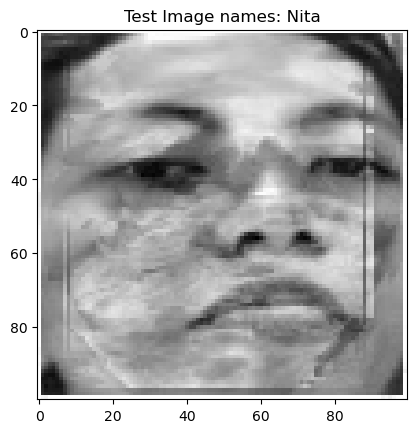

In [43]:
plt.imshow(X_test[test_index].reshape(100, 100), cmap='gray')  # Reshape to original image dimensions
plt.title(f"Test Image names: {names[test_label]}")
plt.show()

/var/folders/0d/6rdnr9tn31z_26gc4wmz92yh0000gn/T/ipykernel_13441/4276282416.py:26: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



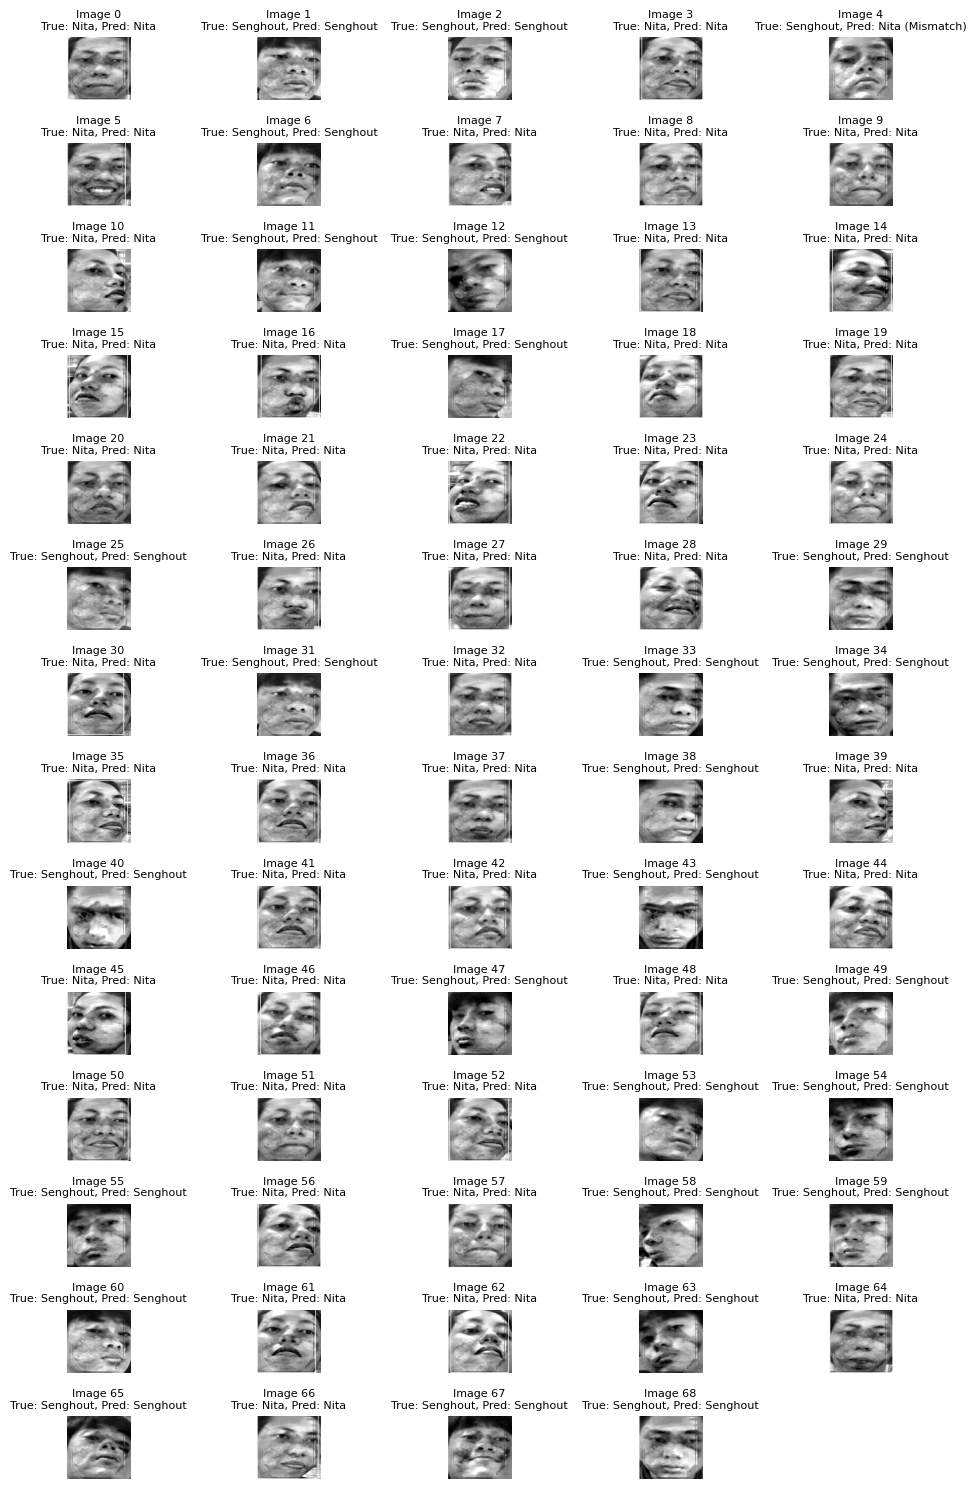

In [39]:
import math

# Define the number of rows and columns for the subplot grid
num_images = len(X_test)
cols = 5  # Number of columns you want
rows = math.ceil(num_images / cols)

# Create a figure for subplots
fig, axs = plt.subplots(rows, cols, figsize=(10, 15))

# # Plot the images
# for i in range(rows):
#     for j in range(cols):
#         index = i * cols + j
#         if index < num_images:
#             axs[i, j].imshow(X_test[index].reshape(100, 100), cmap='gray')  # Adjust the shape based on your data
#             axs[i, j].set_title(f"Image {index} Label: {names[int(y_test[index])]}")
#             axs[i, j].axis('off')  # Turn off axis for cleaner visuals
#         else:
#             axs[i, j].axis('off')  # Turn off empty subplots

for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        if index < num_images:
            true_label = names[int(y_test[index])]
            pred_label = names[int(y_pred[index])]
            title = f"Image {index}\nTrue: {true_label}, Pred: {pred_label}"
            if true_label != pred_label:
                title += " (Mismatch)"
                axs[i, j].set_facecolor('red')  # Highlight mismatched subplot
            axs[i, j].imshow(X_test[index].reshape(100, 100), cmap='gray')
            axs[i, j].set_title(title, fontsize=8)
            axs[i, j].axis('off')
        else:
            axs[i, j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()